# 01 추천 시스템의 개요와 배경

- 유형
  - 콘텐츠 기반 필터링(Content based filtering)
  - 협업 필터링(Collaborative Filtering)
    - 최근접 이웃(Nearest Neighbor)
    - 잠재 요인(Latent Factor) *

# 02 콘텐츠 기반 필터링 추천 시스템

- 사용자가 특정한 아이템을 매우 선호하는 경우, 그 아이템과 비슷한 콘텐츠를 가진 다른 아이템을 추천하는 방식

# 03 최근접 이웃 협업 필터링

- 친구들에게 물어보는 것과 유사한 방식으로, 사용자가 아이템에 매긴 평점 정보나 상품 구매 이력과 같은 사용자 행동 양식(User Behavior)만을 기반으로 추천을 수행하는 것이 협업 필터링(Collaborative Filtering)
- 주 목표: 사용자-아이템 평점 매트릭스와 같은 축적된 사용자 행동 데이터를 기반으로 사용자가 아직 평가하지 않은 아이템을 예측 평가(Predicted Rating)하는 것
- 협업 필터링 기반의 추천 시스템은 최근접 이웃 방식과 잠재 요인 방식으로 나뉘며, 두 방식 모두 사용자-아이템 평점 행렬 데이터에만 의지해 추천을 수행, 협업 필터링 알고리즘에 사용되는 사용자-아이템 평점 행렬에서 행(Row)은 개별 사용자, 열(Column)은 개별 아이템으로 구성
- 사용자-아이템 평점 행렬: 많은 아이템을 열로 가지는 다차원 행렬로, 사용자 아이템에 대한 평점을 매기는 경우가 많지 않기 떄문에 희소 행렬(Sparse Matrix) 특성을 가짐
- 최근접 이웃 협업 필터링은 메모리(Memory) 협업 필터링이라고도 하며, 일반적으로 사용자 기반 아이템 기반으로 다시 나뉨.
  - 사용자 기반(User-User): 당신과 비슷한 고객들이 다음 상품도 구매
  - 아이템 기반(Item-Itme): 이 상품을 선택한 다른 고객들은 다음 상품도 구매 <- 일반적으로 사용자 기반보다 아이템 기반 협업 필터링이 정확도가 높음


# 04 잠재 요인 협업 필터링

- 대규모 다차원 행렬을 SVD와 같은 차원 감소 기법으로 분해하는 과정에서 잠재 요인을 추출, 이러한 기법을 행렬 분해(Matrix Factorization)라고 함.
- 잠재 요인 협업 필터링은 사용자-아이템 평점 행렬 데이터만을 이용해 말 그대로 '잠재 요인'을 끄집어 내는 것
- 다차원 희소행렬인 사용자-아이템 행렬 데이터를 저차원 밀집 행렬의 사용자-잠재 요인 행렬과 아이템-잠재 요인 행렬의 전치 행렬로 분해
- 이렇게 분해된 두 행렬의 내적을 통해 새로운 예측 사용자-아이템 평점 행렬 데이터를 만들어 사용자가 아직 평점을 부여하지 않은 아이템에 대한 예측 평점을 생성하는 것이 잠재 요인 협럭 필터링 알고리즘의 골자

### 행렬 분해의 이해
- 다차원 매트릭스를 저차원 매트릭스로 분해하는 기법으로 대표적으로 SVD, NMF 등이 있음.
- Factorization(분해)은 우리말로 '인수분해'를 말함

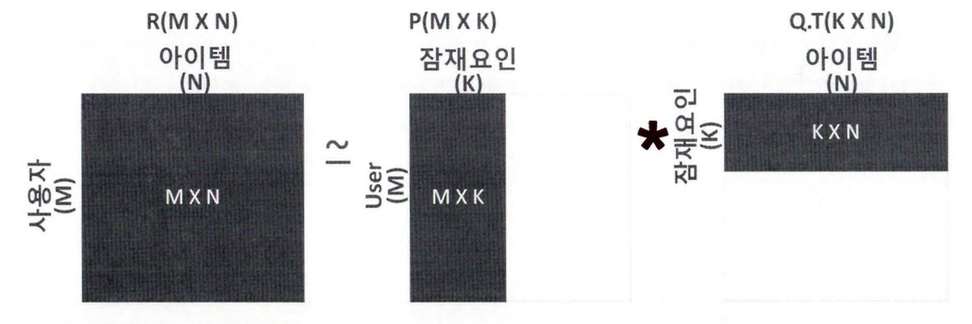

R = P * Q.T
- M은 총 사용자 수
- N은 총 아이템 수
- K는 잠재 요인의 차원 수
- R은 M x N 차원의 사용자-아이템 평점 행렬
- P는 사용자와 잠재 요인과의 관계 값을 가지는 M x K 차원의 사용자-잠재 요인 행렬
- Q는 아이템과 잠재 요인과의 관계 값ㅇ르 가지는 N x K 차원의 아이템-잠재 요인 행렬
- Q.T는 Q 매트릭스의 행과 열 값을 교환한 전치 행렬

### 확률적 경사 하강법을 이용한 행렬 분해

P와 Q 행렬로 계산된 예측 R 행렬 값이 실제 R 행렬 값과 가장 최소의 오류를 가질 수 있도록 반복적인 비용 함수 최적화를 통해 P와 Q를 유추해내는 것

1. P와 Q를 임의의 값을 가진 행렬로 설정
2. P와 Q.T 값을 곱해 예측 R 행렬을 계산하고 예측 R 행렬과 실제 R 행렬에 해당하는 오류 값을 계산
3. 이 오류 값을 최소화할 수 있도록 P와 Q 행렬을 적절한 값으로 각각 업데이트
4. 만족할 만한 오류 값을 가질 때까지 2,3번 작업을 반복하면서 P와 Q 값을 업데이트해 근사화

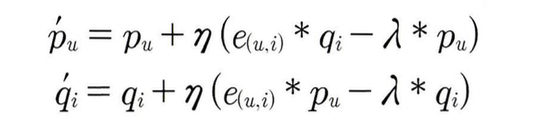

- p_u: P 행렬의 사용자 u행 벡터
- q_i^(t*): Q 행렬의 아이템 i행의 전치 벡터(transpose vector)
- r(u,i): 실제 R 행렬의 u행, i열에 위치한 값
- r(u,i) hat: 예측 R hat 행렬의 u행, i열에 위치한 값. p_u * q_i^t로 계산
- e(u,i): u행, i열에 위치한 실제 행렬 값과 예측 행렬 값의 차이 오류. r(u,i) - r(u,i) hat로 계산
- n: SGD 학습률
- lambda: L2규제 계수

In [7]:
import numpy as np

# 원본 행렬 R 생성, 분해 행렬 P와 Q 초기화, 잠재 요인 차원 k는 3으로 설정.
R = np.array([[4, np.nan, np.nan, 2, np.nan],
              [np.nan, 5, np.nan, 3, 1],
              [np.nan, np.nan, 3, 4, 4],
              [5, 2, 1, 2, np.nan]])

num_users, num_items = R.shape
K=3

# P와 Q 행렬의 크기를 지정하고 정규 분포를 가진 임의의 값으로 입력함
np.random.seed(1)
P = np.random.normal(scale=1./K, size=(num_users, K))
Q = np.random.normal(scale=1./K, size=(num_items, K))

In [8]:
from sklearn.metrics import mean_squared_error

def get_rmse(R, P, Q, non_zeros):
  error = 0
  # 두 개의 분해된 행렬 P와 Q.T의 내적으로 예측 R 행렬 생성
  full_pred_matrix = np.dot(P, Q.T)

  # 실제 R 행렬에서 널이 아닌 값의 위치 인덱스 추출해 실제 R 행렬과 예측 행렬의 RMSE 추출
  x_non_zero_ind = [non_zero[0] for non_zero in non_zeros]
  y_non_zero_ind = [non_zero[1] for non_zero in non_zeros]
  R_non_zeros = R[x_non_zero_ind, y_non_zero_ind]
  full_pred_matrix_non_zeros = full_pred_matrix[x_non_zero_ind, y_non_zero_ind]
  mse = mean_squared_error(R_non_zeros, full_pred_matrix_non_zeros)
  rmse = np.sqrt(mse)

  return rmse

In [10]:
# R > 0인 행 위치, 열 위치, 값을 non_zeros 리스트에 저장
non_zeros = [(i, j, R[i,j]) for i in range(num_users) for j in range(num_items) if R[i,j]>0]

steps=1000
learning_rate=0.01
r_lambda=0.01

# SGD 기법으로 P와 Q 매트릭스를 계속 업데이트
for step in range(steps):
  for i, j, r in non_zeros:
    # 실제 값과 예측 값의 차이인 오류 값 구함
    eij = r - np.dot(P[i,:], Q[j,:].T)
    # Regularization을 반영한 SGD 업데이트 공식 적용
    P[i,:] = P[i,:] + learning_rate*(eij * Q[j,:] - r_lambda*P[i,:])
    Q[j,:] = Q[j,:] + learning_rate*(eij * P[i,:] - r_lambda*Q[j,:])

    rmse = get_rmse(R, P, Q, non_zeros)
    if (step%50) == 0:
      print("### interation step:", step, "rmse:", rmse)

### interation step: 0 rmse: 3.247524130578499
### interation step: 0 rmse: 3.246589494027815
### interation step: 0 rmse: 3.239999647068033
### interation step: 0 rmse: 3.2381472166078975
### interation step: 0 rmse: 3.2383342166320306
### interation step: 0 rmse: 3.2370653166764547
### interation step: 0 rmse: 3.2352359394861545
### interation step: 0 rmse: 3.2334041810598104
### interation step: 0 rmse: 3.228119042416746
### interation step: 0 rmse: 3.226315693141418
### interation step: 0 rmse: 3.2264236635635477
### interation step: 0 rmse: 3.2250303148603425
### interation step: 50 rmse: 0.49213940005967566
### interation step: 50 rmse: 0.4919113622892702
### interation step: 50 rmse: 0.49090159993573856
### interation step: 50 rmse: 0.4907310698690355
### interation step: 50 rmse: 0.49083290293971765
### interation step: 50 rmse: 0.49018969481685243
### interation step: 50 rmse: 0.4902701170765177
### interation step: 50 rmse: 0.4897817855361652
### interation step: 50 rmse: 0.4

In [11]:
pred_matrix = np.dot(P, Q.T)
print('예측 행렬:\n', np.round(pred_matrix, 3))

예측 행렬:
 [[3.99  0.804 1.334 2.002 1.714]
 [6.671 4.978 0.962 2.98  1.003]
 [6.843 0.408 2.987 3.977 3.986]
 [4.968 2.005 1.007 2.018 1.158]]
